In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib as mpl

## 数据分析

### 读入csv文件，并保存在一个DataFrame中（df）

In [2]:
df = pd.read_csv('C:/Users/柠檬/Desktop/air_data.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


### 针对DataFrame列计算汇总处理 

In [3]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62988.0,62988.000000,62437.000000,62850.000000,62988.000000,...,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,0.0,265.689623,5355.376064,5604.026014,17123.878691,...,1355.006223,1620.695847,1080.378882,12545.7771,6638.739585,0.486419,0.513581,0.522293,0.468422,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,0.0,1645.702854,8109.450147,8703.364247,20960.844623,...,7868.477000,8294.398955,5639.857254,20507.8167,12601.819863,0.319105,0.319105,0.339632,0.338956,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,0.0,0.000000,1003.000000,780.000000,4747.000000,...,0.000000,0.000000,0.000000,2775.0000,700.000000,0.250000,0.288889,0.258150,0.167954,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,0.0,0.000000,2800.000000,2773.000000,9994.000000,...,0.000000,0.000000,0.000000,6328.5000,2860.500000,0.500000,0.500000,0.514252,0.476747,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,0.0,0.000000,6574.000000,6845.750000,21271.250000,...,0.000000,345.000000,0.000000,14302.5000,7500.000000,0.711111,0.750000,0.815091,0.728375,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,0.0,74460.000000,239560.000000,234188.000000,580717.000000,...,984938.000000,984938.000000,728282.000000,985572.0000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000


## 处理数据

### 丢弃票价为空的行

In [4]:
df = df[df['SUM_YR_1'].notnull()*df['SUM_YR_1'].notnull()]
df

D:\Anaconda\envs\py36\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,2013/1/20,2013/1/20,女,4,北京,.,CN,35.0,2014/3/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0
62983,18375,2011/5/20,2013/6/5,女,4,广州,广东,CN,25.0,2014/3/31,...,12318,12318,12123,12318,12123,1.000000,0.000000,0.000000,0.000000,22
62984,36041,2010/3/8,2013/9/14,男,4,佛山,广东,CN,38.0,2014/3/31,...,106972,106972,56506,106972,56506,1.000000,0.000000,0.000000,0.000000,43
62985,45690,2006/3/30,2006/12/2,女,4,广州,广东,CN,43.0,2014/3/31,...,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0


### 保留票价非0，或者平均折扣率不为0且总飞行公里数大于0的记录

In [5]:
index1 = df['SUM_YR_1'] != 0
index2 = df['SUM_YR_2'] != 0
index3 = (df['SEG_KM_SUM'] == 0) & (df['avg_discount'] == 0)
cleaned = df[index1 | index2 | index3]

In [6]:
cleaned.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62182.000000,62182.000000,61769.000000,62182.000000,62182.000000,62182.0,62182.000000,62182.000000,62044.000000,62182.000000,...,62182.000000,62182.000000,62182.000000,62182.000000,62182.000000,62182.000000,62182.000000,62182.000000,62182.000000,62182.000000
mean,31492.069554,4.103454,42.502291,11.950259,11036.662410,0.0,269.133479,5377.337739,5676.826688,17289.997089,...,1364.730469,1633.863948,1090.281979,12670.526358,6715.579219,0.490798,0.509202,0.518235,0.472803,2.750105
std,18189.056155,0.376012,9.887677,14.102171,16412.895354,0.0,1656.054624,8118.791457,8736.092628,21040.301005,...,7898.521632,8327.895269,5665.577438,20601.371160,12660.235814,0.317648,0.317648,0.338388,0.337837,7.393530
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15723.250000,4.000000,35.000000,3.000000,2584.000000,0.0,0.000000,1024.000000,856.000000,4845.000000,...,0.000000,0.000000,0.000000,2838.000000,763.000000,0.250000,0.285714,0.254438,0.179850,0.000000
50%,31486.500000,4.000000,41.000000,7.000000,5796.000000,0.0,0.000000,2820.000000,2838.000000,10172.000000,...,0.000000,0.000000,0.000000,6433.000000,2918.000000,0.500000,0.500000,0.510577,0.481013,0.000000
75%,47254.750000,4.000000,48.000000,15.000000,12972.000000,0.0,0.000000,6600.000000,6928.000000,21489.000000,...,0.000000,376.000000,0.000000,14450.500000,7588.750000,0.714286,0.750000,0.803158,0.732924,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,0.0,74460.000000,239560.000000,234188.000000,580717.000000,...,984938.000000,984938.000000,728282.000000,985572.000000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000


## 利用Pandas构建LRFMC模型

### 处理出以2014-03-31为结束时间的数据

In [7]:
cleaned['LOAD_TIME']

0        2014/3/31
1        2014/3/31
2        2014/3/31
3        2014/3/31
4        2014/3/31
           ...    
62974    2014/3/31
62975    2014/3/31
62976    2014/3/31
62977    2014/3/31
62978    2014/3/31
Name: LOAD_TIME, Length: 62182, dtype: object

In [8]:
cleaned = cleaned.drop(index=(cleaned.loc[(cleaned['LOAD_TIME']<'2014/3/31')].index))
cleaned['LOAD_TIME']

0        2014/3/31
1        2014/3/31
2        2014/3/31
3        2014/3/31
4        2014/3/31
           ...    
62974    2014/3/31
62975    2014/3/31
62976    2014/3/31
62977    2014/3/31
62978    2014/3/31
Name: LOAD_TIME, Length: 62182, dtype: object

### 取出LRFMC数据

In [9]:
data = cleaned[['FFP_DATE', 'LOAD_TIME', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
data

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2006/11/2,2014/3/31,1,210,580717,0.961639
1,2007/2/19,2014/3/31,7,140,293678,1.252314
2,2007/2/1,2014/3/31,11,135,283712,1.254676
3,2008/8/22,2014/3/31,97,23,281336,1.090870
4,2009/4/10,2014/3/31,5,152,309928,0.970658
...,...,...,...,...,...,...
62974,2005/5/8,2014/3/31,89,2,368,0.710000
62975,2008/11/16,2014/3/31,121,2,368,0.670000
62976,2010/7/8,2014/3/31,39,2,1062,0.225000
62977,2012/12/20,2014/3/31,464,2,904,0.250000


 L = LOAD_TIME - FFP_DATE   会员入会时间距观测窗口结束的月数【单位：无】
 
 R = LAST_TO_END  客户最近一次乘坐公司飞机距观测窗口结束的月数【单位：月】
 
 F = FLIGHT_COUNT  客户在观测窗口内乘坐公司飞机的次数【单位：次】
 
 M = SEG_KM_SUM  观测时间内累计飞行里程【单位：公里】

C = avg_discount  观测时间内乘坐舱位对应的折扣系数的平均值【单位：无】

In [10]:
data['L'] = (pd.to_datetime(data['LOAD_TIME']) - pd.to_datetime(data['FFP_DATE']))/30
data['R'] = data['LAST_TO_END']/30
data['F'] = data['FLIGHT_COUNT']
data['M'] = data['SEG_KM_SUM']
data['C'] = data['avg_discount']

D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [11]:
data=data[['L', 'R', 'F', 'M', 'C']]
data

,L,R,F,M,C
0,90 days 04:48:00,0.033333,210,580717,0.961639
1,86 days 13:36:00,0.233333,140,293678,1.252314
2,87 days 04:00:00,0.366667,135,283712,1.254676
3,68 days 05:36:00,3.233333,23,281336,1.090870
4,60 days 12:48:00,0.166667,152,309928,0.970658
...,...,...,...,...,...
62974,108 days 07:12:00,2.966667,2,368,0.710000
62975,65 days 08:48:00,4.033333,2,368,0.670000
62976,45 days 09:36:00,1.300000,2,1062,0.225000
62977,15 days 12:48:00,15.466667,2,904,0.250000


## 利用sklearn进行数据标准化处理

### 对数据进行标准化计算（每项数据减去数据(axis=0)平均值
### 后除以数据(axis=0)的标准差值std(axis=0)）

#### 每项数据减去数据(axis=0)平均值

In [12]:
data['L'] = data['L'] - data.mean(axis=0)['L']
data['R'] = data['R'] - data.mean(axis=0)['R']
data['F'] = data['F'] - data.mean(axis=0)['F']
data['M'] = data['M'] - data.mean(axis=0)['M']
data['C'] = data['C'] - data.mean(axis=0)['C']
data

D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,L,R,F,M,C
0,40 days 13:55:40.354443408,-5.721288,198.049741,563427.002911,0.239519
1,36 days 22:43:40.354443408,-5.521288,128.049741,276388.002911,0.530194
2,37 days 13:07:40.354443408,-5.387955,123.049741,266422.002911,0.532555
3,18 days 14:43:40.354443408,-2.521288,11.049741,264046.002911,0.368749
4,10 days 21:55:40.354443408,-5.587955,140.049741,292638.002911,0.248538
...,...,...,...,...,...
62974,58 days 16:19:40.354443408,-2.787955,-9.950259,-16921.997089,-0.012120
62975,15 days 17:55:40.354443408,-1.721288,-9.950259,-16921.997089,-0.052120
62976,-5 days +18:43:40.354443408,-4.454621,-9.950259,-16227.997089,-0.497120
62977,-35 days +21:55:40.354443408,9.712045,-9.950259,-16385.997089,-0.472120


#### 除以数据(axis=0)的标准差值std(axis=0)

In [13]:
data['L'] = data['L'] / data.std(axis=0)['L']
data['R'] = data['R'] / data.std(axis=0)['R']
data['F'] = data['F'] / data.std(axis=0)['F']
data['M'] = data['M'] / data.std(axis=0)['M']
data['C'] = data['C'] / data.std(axis=0)['C']
data

D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,L,R,F,M,C
0,1.436031,-0.946335,14.043919,26.778467,1.295356
1,1.307457,-0.913254,9.080144,13.136124,2.867373
2,1.328689,-0.891200,8.725589,12.662462,2.880142
3,0.658688,-0.417036,0.783549,12.549535,1.994254
4,0.386206,-0.924281,9.931077,13.908451,1.344131
...,...,...,...,...,...
62974,2.076542,-0.461144,-0.705583,-0.804266,-0.065548
62975,0.557245,-0.284711,-0.705583,-0.804266,-0.281874
62976,-0.149323,-0.736821,-0.705583,-0.771282,-2.688503
62977,-1.206226,1.606431,-0.705583,-0.778791,-2.553299


## 使用K-Means聚类算法对客户数据进行客户分群

In [14]:
kmodel = KMeans(n_clusters=5,n_jobs=4) # 聚类类别数为5
data_1 = data
kmodel.fit(data_1) # 训练模型

D:\Anaconda\envs\py36\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=5, n_jobs=4)

### 查看聚类中心

In [15]:
kmodel.cluster_centers_

array([[ 0.01890387,  0.01379114, -0.2528343 , -0.26179711,  2.06882888],
       [ 0.48472405, -0.80109105,  2.48569333,  2.42621477,  0.31514482],
       [-0.70078989, -0.41671957, -0.15839376, -0.15752526, -0.2687303 ],
       [-0.31270291,  1.69082581, -0.57344847, -0.53546259, -0.18833752],
       [ 1.16432773, -0.37852566, -0.08447972, -0.09203292, -0.16325209]])

### 统计分类情况

In [16]:
r1 = pd.Series(kmodel.labels_).value_counts()
r1

2    24480
4    15670
3    12035
1     5343
0     4654
dtype: int64

### 聚类中心

In [17]:
r2 = pd.DataFrame(kmodel.cluster_centers_)
r2

,0,1,2,3,4
0,0.018904,0.013791,-0.252834,-0.261797,2.068829
1,0.484724,-0.801091,2.485693,2.426215,0.315145
2,-0.700790,-0.416720,-0.158394,-0.157525,-0.268730
3,-0.312703,1.690826,-0.573448,-0.535463,-0.188338
4,1.164328,-0.378526,-0.084480,-0.092033,-0.163252


## 数据可视化（画出雷达图）

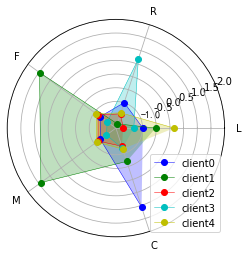

In [18]:
# 绘制雷达图
#标签
labels = data.columns
#数据个数
k = 5 
plot_data = kmodel.cluster_centers_
#指定颜色
color = ['b', 'g', 'r', 'c', 'y'] 

angles = np.linspace(0, 2*np.pi, k, endpoint=False) 

fig = plt.figure()
#polar参数
ax = fig.add_subplot(111, polar=True) 
for i in range(len(plot_data)):
    # 画线
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = "client"+str(i), linewidth=0.5)
    ax.fill(angles, plot_data[i], facecolor=color[i], alpha=0.25)
    
ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")
plt.thetagrids(angles * 180/np.pi, labels)
plt.legend(loc = 4)
plt.show()

## 结合雷达图进行分析

In [19]:
r1

2    24480
4    15670
3    12035
1     5343
0     4654
dtype: int64

1.第一簇人群，4654人，最大的特点就是平均折扣率都是最高的，应该是属于乘坐高等舱的商务人员，应该重点保持的对象，也是需要重点发展的对象，另外应该积极采取相关的优惠政策是他们的乘坐次数增加

2.第二簇人群，5343人，总里程和飞行次数都是最多的，是重点保持对象

3.第三簇人群，24480人，各方面的数据都是比较低的，属于一般或低价值用户

4.第四簇人群，12035人，最大的特点是时间间隔差值最大，分析可能是“季节型客户”，一年中在某个时间段需要多次乘坐飞机进行旅行，其他的时间则出行的不多，这类客户我们需要在保持的前提下，进行一定的发展；

5.第五簇人群，15670人，最大的特点就是入会的时间较长，属于老客户按理说平均折扣率应该较高才对，但是观察窗口的平均折扣率较低，而且总里程和总次数都不高，分析可能是流失的客户，需要在争取一下，尽量让他们“回心转意”；